# Análise Exploratória dos Dados (AED) -- Parte 1

Nesta parte inicial exploraremos os dados disponíveis, buscando alguns insights que podem ser úteis para a etapa de modelagem. Desenvolvemos, nessa e nas demais etapas, notebooks no próprio kaggle, sob a competição Restaurant Revenue Prediction(Predict annual restaurant sales based on objective measurements), que serão detalhados ao longo dessa questão.

Neste trabalho, temos como objetivo explorar as diferenças de receita em restaurantes na Turquia, utilizando modelos estatísticos para prever possíveis receitas de outros restaurantes com base em suas características e estimativas. O conjunto de dados fornecerá informações como o ID do restaurante, a data de abertura, a cidade em que o restaurante está localizado na Turquia, a indicação se a cidade é considerada grande ou não, o tipo de culinária oferecido pelo restaurante, e também variáveis não especificamente denominadas que estão relacionadas à população local, desempenho econômico, condições geográficas e outros fatores relevantes.

Nosso objetivo principal é desenvolver modelos supervisionados, uma vez que o conjunto de treinamento do problema já possui receitas bem definidas, juntamente com as características correspondentes. Esses modelos nos ajudarão a prever as possíveis receitas de outros restaurantes com base em suas características específicas e nas informações disponíveis.

In [3274]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.stats import norm

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [3275]:
caminho = "C:/Users/Cliente/Desktop/Métodos computacionais/Kagle Revenue Restaurant/restaurant-revenue-prediction/train.csv"
df = pd.read_csv(caminho)

print("colunas:", df.columns)

colunas: Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')


Aproveitando para já excluir "Id", que não é relevante pra gente.

In [3276]:
df = df.drop(['Id'],axis=1)

Observando as primeiras linhas da base de dados:

In [3277]:
print(df.head())

    Open Date        City  City Group Type  P1   P2   P3   P4  P5  P6  ...   
0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2   2  ...  \
1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   2  ...   
2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2   3  ...   
3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4   4  ...   
4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2   2  ...   

   P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0  3.0    5    3    4    5    5    4    3    4  5653753.0  
1  3.0    0    0    0    0    0    0    0    0  6923131.0  
2  3.0    0    0    0    0    0    0    0    0  2055379.0  
3  7.5   25   12   10    6   18   12   12    6  2675511.0  
4  3.0    5    1    3    2    3    4    3    3  4316715.0  

[5 rows x 42 columns]


Podemos perceber que as colunas do dataframe seguem uma estrutura típica deste tipo de base de dados: a primeira coluna traz o 'id' da observação e a última o nosso target, e entre elas 41 colunas de features, tanto numéricos quanto categóricos, que vamos explorar depois. Uma das nossas dificuldades aqui é que 37 das variavés disponíveis são anônimas. Não sabemos o que elas representam. Apenas que dentre elas temos: população em determinada area, idade, distribuição de gênero, custo do metro quadrado, disponibilidade de estacionamento, presença de escolas, bancos. São, em geral, dados demográficos, geográficos e comerciais. Sem conhecer o significado das variáveis anônimas, pode ser difícil determinar se elas são relevantes para a previsão de receita. A seleção de recursos adequada é fundamental para construir um modelo preciso e robusto. A falta de compreensão das variáveis anônimas pode levar a escolhas inadequadas na seleção de recursos, resultando em modelos subótimos.Também pode prejudicar a interpretação do modelo. É possível ter potenciais correlações ocultas, impactando a previsão da receita. 

Já aproveitamos para verificar quas colunas possuem dados faltantes:

In [3278]:
df.columns[df.isna().any()]

Index([], dtype='object')

Ou seja, não há features com dados faltantes. Partimos então para a avaliação do target e das features. 

__Avaliação do target__

Plotamos a distribuição do da receita e verificamos medidas de assimetria e de curtose:

 A assimetria de Revenue é 2.76279966221059 e a kurtose de Revenue é 11.576201267807798


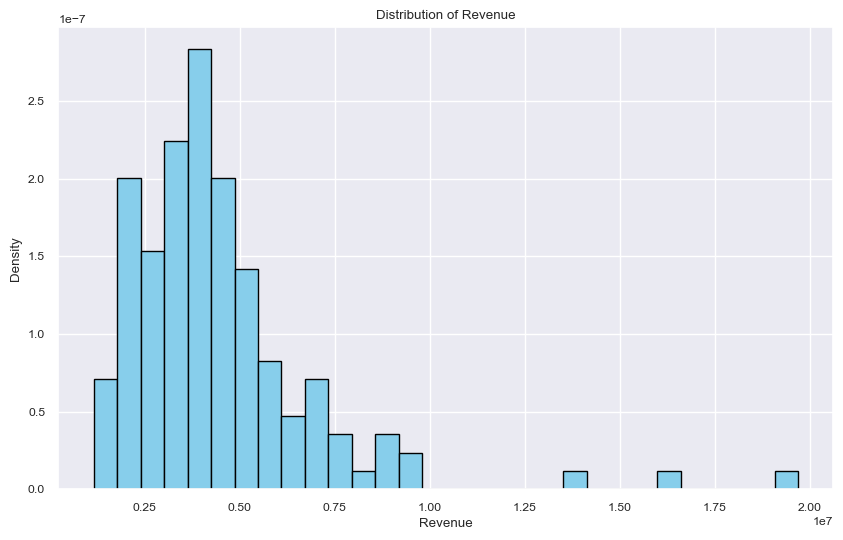

In [3279]:
# Plotar histograma 
plt.figure(figsize=(10, 6))
plt.hist(df['revenue'], bins=30, color='skyblue', edgecolor='black', density=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Density')

# Calculate skewness and kurtosis
revenue_skewness = skew(df['revenue'])
revenue_kurtosis = kurtosis(df['revenue'])

print(f" A assimetria de Revenue é {revenue_skewness} e a kurtose de Revenue é {revenue_kurtosis}")

Podemos perceber que a nossa distribuição é assimétrica com cauda longa à direita. Aplicamos então uma transformação logarítmica em nosso target, e verificamos que com isso basicamente a aproximamos para uma distribuição Normal, o que utilizaremos na etapa de modelagem:

 A assimetria de Revenue é 0.30402608381079993 e a kurtose de Revenue é 0.7122006011301187

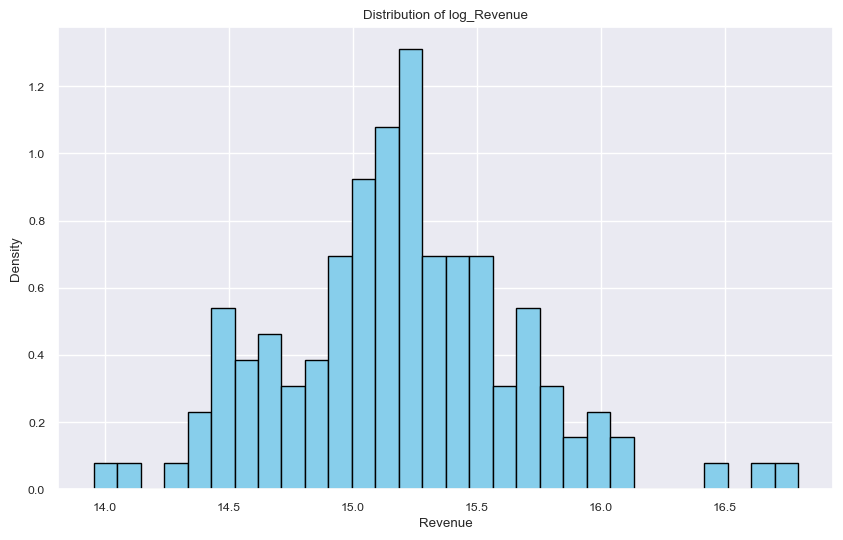

In [3280]:
# Apply the logarithmic transformation
df['log_revenue'] = np.log1p(df['revenue'])

# Vendo o gráfico novo
# Plotar histograma 
plt.figure(figsize=(10, 6))
plt.hist(df['log_revenue'], bins=30, color='skyblue', edgecolor='black', density=True)
plt.title('Distribution of log_Revenue')
plt.xlabel('Revenue')
plt.ylabel('Density')

# Calculate skewness and kurtosis
revenue_skewness = skew(df['log_revenue'])
revenue_kurtosis = kurtosis(df['log_revenue'])

print(f" A assimetria de Revenue é {revenue_skewness} e a kurtose de Revenue é {revenue_kurtosis}")

__Avaliação dos Features__

Se verificarmos a base de dados apenas pelo tipo em que os dados são codificados:

In [3281]:
df.dtypes.value_counts()

int64      29
float64    10
object      4
Name: count, dtype: int64

__Variável Open Date__: Para usar a variável "Open Date" em um modelo de machine learning, é útil convertê-la em um formato compreensível pelo modelo. Uma abordagem comum é transformar a "Open Date" em uma variável numérica que representa algum aspecto relevante do tempo para a receita. Por exemplo, você pode criar uma nova variável que represente o número de dias (ou meses, anos, etc.) desde a data de abertura até uma data de referência específica, como a data mais recente no conjunto de dados.

__Variáveis Categóricas__: As variáveis "City", "City Group" e "Type" são categóricas. Para utilizá-las em um modelo de machine learning, é comum aplicar a técnica de codificação one-hot. Essa técnica cria novas colunas para cada categoria única em cada variável categórica e preenche essas colunas com 0s e 1s para indicar a presença da categoria correspondente em cada linha. É possível realizar essa codificação facilmente utilizando a função get_dummies() do pandas. Ainda não vamos fazer isso. Vamos fazer algumas análises iniciais anteriormente. 

__Variáveis Numéricas P1 a P37__: Essas variáveis já estão em formato numérico, então talvez não seja necessário realizar nenhum pré-processamento adicional. No entanto, pode ser útil normalizar ou padronizar esses recursos, especialmente se você planeja utilizar algoritmos de machine learning que são sensíveis à escala das variáveis, como regressão linear, SVMs ou redes neurais. Já foi realizada a normalização da variável de destino ("revenue"), então pode fazer sentido aplicar a mesma normalização a essas variáveis. Vamos com calma aqui ainda. 


__Variáveis categóricas__

Vamos começar analisando primeiro as 3 variáveis categóricas do conjunto de dados -- "City", "City Group" e "Type" --. Vamos fazer também o gráfico de violino que tem uma função parecida com o boxplot. 

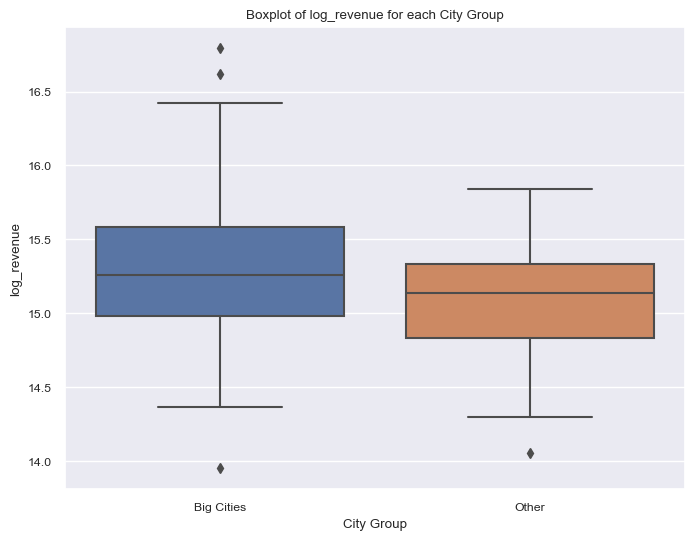

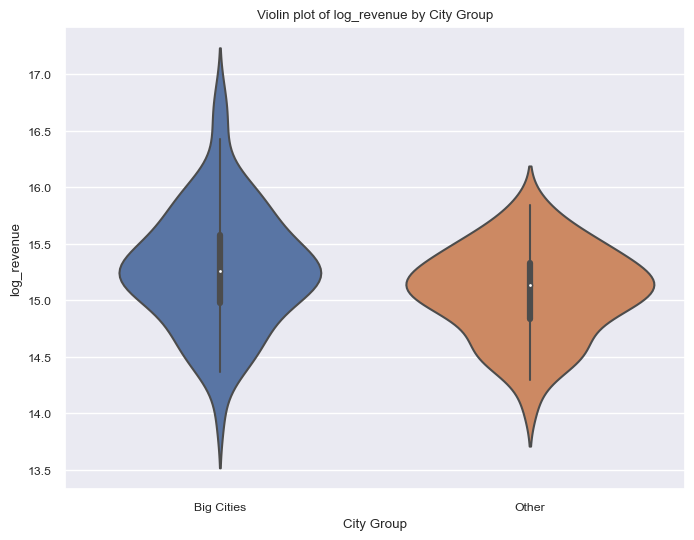

In [3282]:
# Boxplot of log_revenue for each City Group
plt.figure(figsize=(8, 6))
sns.boxplot(x='City Group', y='log_revenue', data=df)
plt.title('Boxplot of log_revenue for each City Group')
plt.xlabel('City Group')
plt.ylabel('log_revenue')
plt.show()

# Violin plot of log_revenue for each City Group
plt.figure(figsize=(8, 6))
sns.violinplot(x='City Group', y='log_revenue', data=df)
plt.title('Violin plot of log_revenue by City Group')
plt.xlabel('City Group')
plt.ylabel('log_revenue')
plt.show()


Podemos perceber que a receita é maior em resturantes localizados em grandes metrópoles. Vamos transformar essa coluna em dummie depois. Mas também temos restaurantes em grande cidade com receitas menores do que em outras, o que faz sentido. Tem mais restaurantes em Big Cities. 

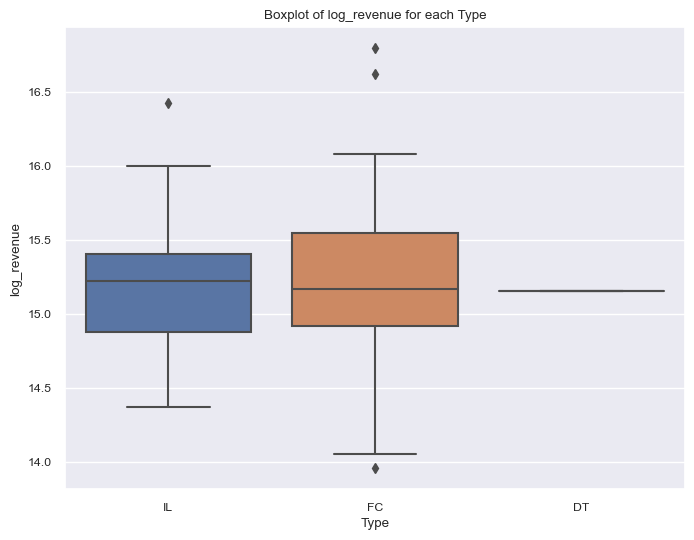

In [3283]:
# Boxplot of log_revenue for each Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='log_revenue', data=df)
plt.title('Boxplot of log_revenue for each Type')
plt.xlabel('Type')
plt.ylabel('log_revenue')
plt.show()

Restaurantes do tipo Food Court (FC): A mediana de log_revenue é maior para os restaurantes FC em comparação com os restaurantes IL. No entanto, a faixa interquartil é bastante ampla para os restaurantes FC, indicando uma grande variação na receita entre esses restaurantes.

Restaurantes Inline (IL): A mediana de log_revenue é menor para os restaurantes IL em comparação com os restaurantes FC. A faixa interquartil é um pouco mais estreita para os restaurantes IL, indicando uma menor variação na receita entre esses restaurantes.

No total existem 4 tipos de restaurante possíveis, mas isso está muito desbalançeado e temos a dominância de IL e FC na base de treino. Vamos excluir essa coluna para evitar desbalanceamento. 

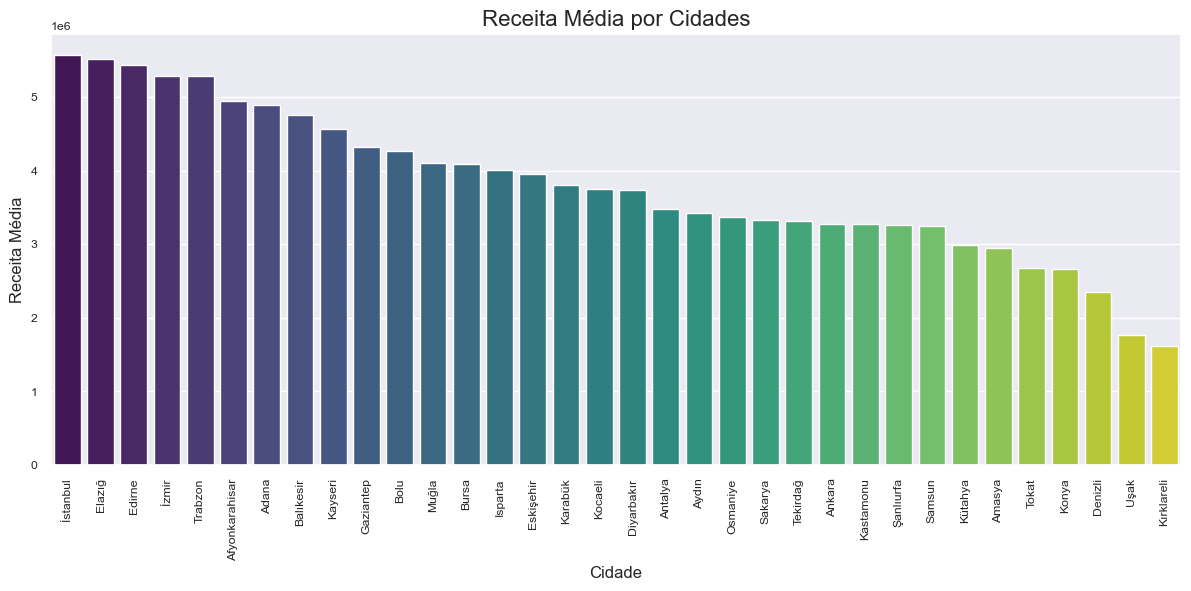

In [3284]:
# Calcular a receita média por cidade
city_revenue_mean = df.groupby("City")["revenue"].mean().sort_values(ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=city_revenue_mean.index, y=city_revenue_mean.values, palette="viridis")
ax.set_title("Receita Média por Cidades", fontsize=16)
ax.set_xlabel("Cidade", fontsize=12)
ax.set_ylabel("Receita Média", fontsize=12)
ax.set_xticklabels(city_revenue_mean.index, rotation=90)
plt.tight_layout()

# Exibir o gráfico
plt.show()

Esse gráfico tem uma relação muito grande com a outra variável categórica City Group. Podemos ver que Istambul está no topo, o que vai ao encontro da análise anterior que mostrava que cidades grandes tendem a ter uma receita maior que as outras cidades menores. Uma vez que já temos a variável City Group, talvez não seja necessário essa variável de cidades na nossa base de dados. Vou excluí-la depois. No caso do gráfico acima, eu não utilizei o log da receita. Ficou melhor sem o log para ver a diferença média entre as cidades. 

__Variável Open Date__

Estamos trabalhando com variáveis numéricas agora. Vamos transformar a variável de data em Days Opened, que mostra os dias desde quando o restaurante foi aberto, ou seja, quanto mais dias abertos, mais velho é o restaurante. 

In [3285]:
# Convert 'Open Date' to datetime format
df['Open Date'] = pd.to_datetime(df['Open Date'])

# Create a new feature 'Days Opened'
max_date = df['Open Date'].max()
df['Days Opened'] = (max_date - df['Open Date']).dt.days

# Show the first few rows of the DataFrame
df.head()


,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P31,P32,P33,P34,P35,P36,P37,revenue,log_revenue,Days Opened
0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3,4,5,5,4,3,4,5653753.0,15.547830,5306
1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,6923131.0,15.750379,2172
2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,0,2055379.0,14.535971,322
3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,12,10,6,18,12,12,6,2675511.0,14.799651,723
4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,1,3,2,3,4,3,3,4316715.0,15.278005,1722


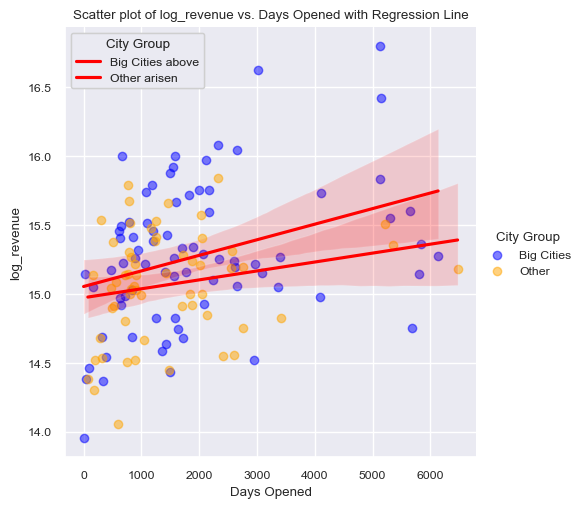

In [3286]:
# Define a custom color palette
custom_palette = ['blue', 'orange']

# Scatter plot with a regression line, colored by 'City Group' with custom palette
lm = sns.lmplot(x='Days Opened', y='log_revenue', hue='City Group', data=df, 
                line_kws={'color': 'red'}, scatter_kws={'alpha':0.5}, palette=custom_palette)
plt.title('Scatter plot of log_revenue vs. Days Opened with Regression Line')

# Get the two lines from the plot and create a new legend
l1 = lm.ax.lines[0]
l2 = lm.ax.lines[1]
new_legend = plt.legend(handles=[l1, l2], labels=["Big Cities above", "Other arisen"], title="City Group")
lm.ax.add_artist(new_legend)

plt.show()


Como você pode ver, a linha de regressão tem uma inclinação positiva, o que confirma a correlação positiva entre Days Opened e log_revenue que observamos anteriormente. Isso sugere que, em média, restaurantes que estão abertos há mais tempo tendem a ter uma receita maior.

No entanto, a dispersão dos pontos em torno da linha de regressão indica que há muita variação na receita que não é explicada apenas pelo número de dias abertos. Isso sugere que outras variáveis provavelmente também são importantes para prever a receita.

# Análise Exploratória dos Dados (AED) -- Parte 2

__Análise das correlações entre os features numéricos anônimos__

Uma forma interessante de verificar as correlações entre as features e entre elas e o target é por meio do mapa de calor.  Assim, plotamos o mapa de calor completo das variáveis numéricas. 

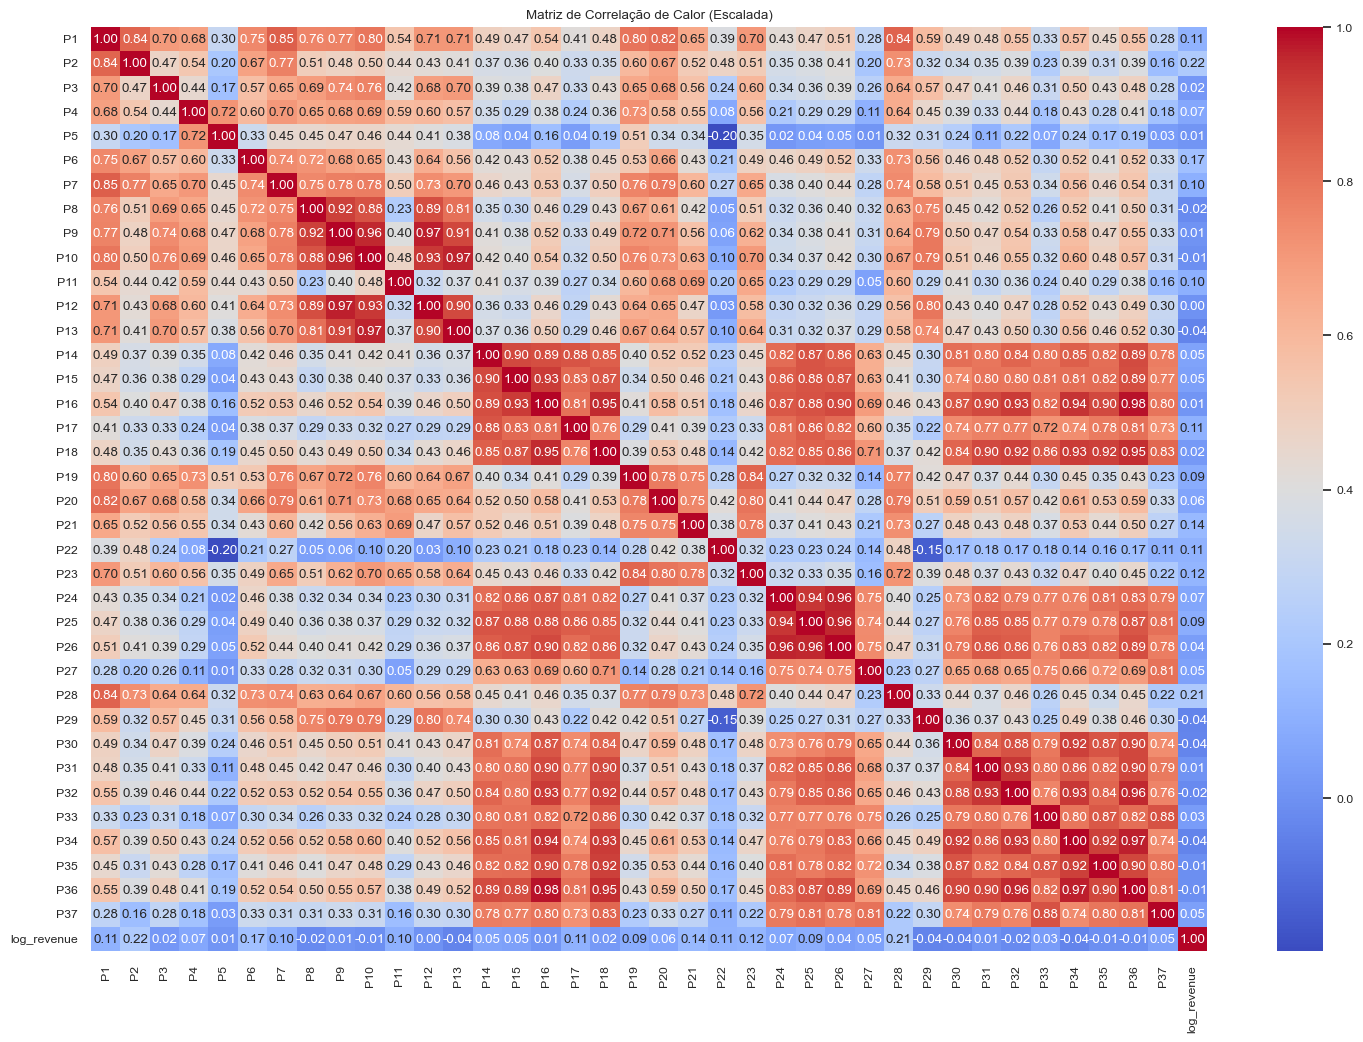

In [3287]:
# Excluir as variáveis categóricas do DataFrame
numerical_df = df.drop(['City', 'City Group', 'Type', 'Open Date', 'Days Opened', "revenue"], axis=1)

# Calcular a matriz de correlação
correlation_matrix = numerical_df.corr()

# Gerar a matriz de calor com números ajustados e nomes das variáveis
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação de Calor (Escalada)')
plt.show()

Podemos notar que existe muita correlação entre as variáveis P1 a P37, mas não entre as variáveis "P" e o log_revenue. 

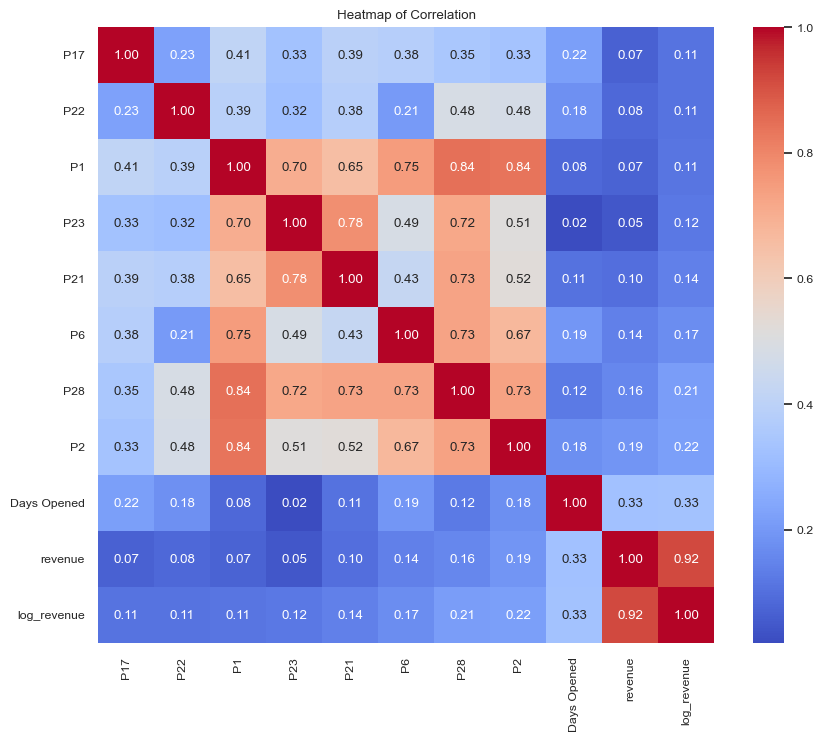

In [3288]:
# Calculate the correlation of 'log_revenue' with the other numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns
correlations = df[numeric_columns].corr()['log_revenue'].sort_values()
# Select the 10 variables with the highest absolute correlation with 'log_revenue'
selected_variables = correlations.abs().sort_values().tail(11).index

# Calculate the correlation matrix for the selected variables
corr_matrix = df[selected_variables].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation')
plt.show()

Olhando mais de perto as correlações, podemos ver muita cor azul e pouca cor vermelha, indicando baixa correlação entre as features e o target log_revenue. 

# Engenharia de Feature

Faz sentido para mim remover a coluna 'Cidade', pois acredito que a variável 'Grupo de cidades' captura as informações relevantes e os nomes individuais das cidades não agregam muito valor preditivo. Além disso, em relação à coluna 'Tipo', percebo que está muito desequilibrada e pode não fornecer muitas informações para o meu modelo, especialmente se a categoria minoritária não estiver fortemente associada a alterações na variável de destino ('receita'). Portanto, eu optaria por remover essa coluna também. Também irei excluir as variáveis de data. Não creio que os dias abertos de restaurantes antigos poderiam influenciar a receita de novos restaurantes. Como era de se esperar, existe grande correlação entre várias colunas de P1 a P37. 

In [3289]:
# Drop 'City' and 'Type' columns
data = df.drop(['City', 'Type', 'revenue', 'Days Opened', 'Open Date'], axis=1)

# Perform one-hot encoding on 'City Group'
data = pd.get_dummies(data, columns=['City Group'], drop_first = True)
data['City Group_Other'] = data['City Group_Other'].astype(int)

data.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P30,P31,P32,P33,P34,P35,P36,P37,log_revenue,City Group_Other
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,5,3,4,5,5,4,3,4,15.547830,0
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,0,0,0,0,0,0,0,0,15.750379,0
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,0,0,0,0,0,0,0,0,14.535971,1
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,25,12,10,6,18,12,12,6,14.799651,1
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,5,1,3,2,3,4,3,3,15.278005,1


Uma técnica eficaz para reduzir a quantidade de colunas e diminuir a correlação entre elas, ao mesmo tempo em que se reduz a possibilidade de overfitting, é o Principal Component Analysis (PCA). O PCA é usado para reduzir a dimensionalidade dos dados, mantendo a maior parte da variância original. Ao utilizar os componentes principais em vez das variáveis originais, é possível obter um conjunto menor de variáveis que captura as informações mais relevantes.

Os componentes principais são combinações lineares das variáveis originais e são ordenados por importância, onde o primeiro componente retém a maior variância, o segundo componente retém a segunda maior variância e assim por diante. Ao selecionar um número menor de componentes principais, é possível reduzir a dimensionalidade dos dados.

Uma das vantagens do PCA é que os componentes principais são ortogonais entre si, o que significa que são linearmente independentes e não apresentam correlação. Isso ajuda a reduzir a correlação entre as colunas originais e evita problemas de overfitting, onde o modelo se ajusta muito aos dados de treinamento, mas não generaliza bem para novos dados.

Para garantir que o PCA seja eficiente, especialmente quando os dados são diversos e não estão no mesmo padrão, é recomendado padronizar os recursos (features). Isso é importante porque o PCA é sensível a variâncias muito grandes ou muito pequenas. A padronização dos recursos pode ser realizada utilizando-se a ferramenta StandardScaler do sklearn, que ajusta os dados para que eles tenham média zero e desvio padrão igual a um.

Portanto, aplicar o PCA juntamente com a padronização dos recursos é uma abordagem coerente e eficaz para reduzir a dimensionalidade, diminuir a correlação entre as colunas e evitar problemas de overfitting em conjuntos de dados com características diversas.

É importante ressaltar que, ao realizar a normalização dos dados, devemos separar a base em dados de treinamento e teste e utilizar apenas os dados de treinamento para moldar os parâmetros da normalização. Dessa forma, garantimos que não haja vazamento de informações do conjunto de teste durante o processo.

No caso específico em que você tem uma variável de destino chamada 'log_revenue' e deseja realizar a normalização das variáveis preditoras, é comum não normalizar a variável de destino. Normalmente, a normalização é aplicada nas variáveis preditoras (features) para garantir que elas estejam na mesma escala e evitar que algumas variáveis dominem a análise. Usaremos 20% dos dados para teste. 


In [3290]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('log_revenue', axis=1)
y = data['log_revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

X_train_pca.shape, X_test_pca.shape

((109, 14), (28, 14))

Depois de aplicar o PCA com um limite de retenção de 95% da variância, a dimensionalidade dos dados é reduzida de 38 recursos para 14 componentes principais. O conjunto de treinamento agora possui 109 amostras e 14 recursos, enquanto o conjunto de teste possui 28 amostras e 14 recursos. Agora é possível prosseguir com análises adicionais ou construção de modelos usando os dados de dimensionalidade reduzida. 

Vamos treinar cada modelo nos dados de treinamento e, em seguida, fazer previsões nos dados de teste. Usaremos o erro quadrático médio (MSE) como métrica de desempenho para avaliar e comparar os modelos.

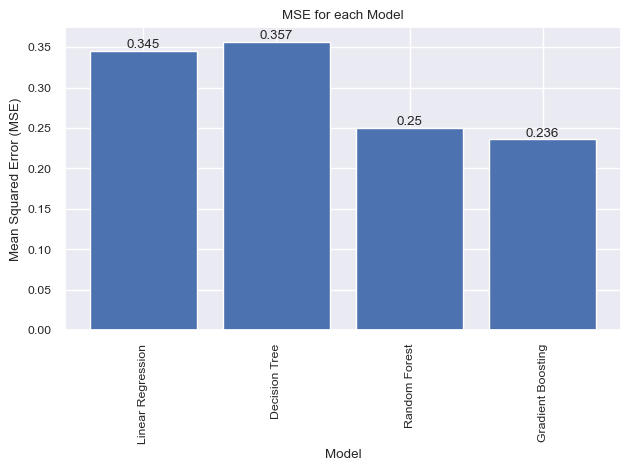

In [3291]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define the models
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42))
]

# Function to train the model and compute MSE
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse

# Dictionary to store the results
results = {}

if __name__ == "__main__":
# Apply each model
    for name, model in models:
        mse = train_and_evaluate_model(model, X_train_pca, y_train, X_test_pca, y_test)
        results[name] = mse

# Extract the MSE values
mse_values = list(results.values())

# Plot the MSE values
plt.bar(range(len(results)), mse_values)
plt.xticks(range(len(results)), results.keys(), rotation='vertical')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for each Model')

# Add the numbers above the bars
for i, v in enumerate(mse_values):
    plt.text(i, v, str(round(v, 3)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Valores mais baixos de MSE indicam melhor desempenho. Portanto, o modelo Gradient Boosting teve o melhor desempenho neste conjunto de dados de acordo com a métrica MSE.

Lembre-se de que esses resultados são baseados nos hiperparâmetros padrão de cada modelo. O ajuste fino adicional dos hiperparâmetros pode melhorar o desempenho. Além disso, esses resultados são baseados em uma única divisão de teste de trem. Para obter uma estimativa mais confiável do desempenho do modelo, vamos usar validação cruzada. Usaremos a validação cruzada de 5 vezes, que é uma escolha comum. Para cada modelo, vamos treiná-lo usando validação cruzada de 5 vezes nos dados de treinamento e relatar a média do erro quadrado médio (MSE).

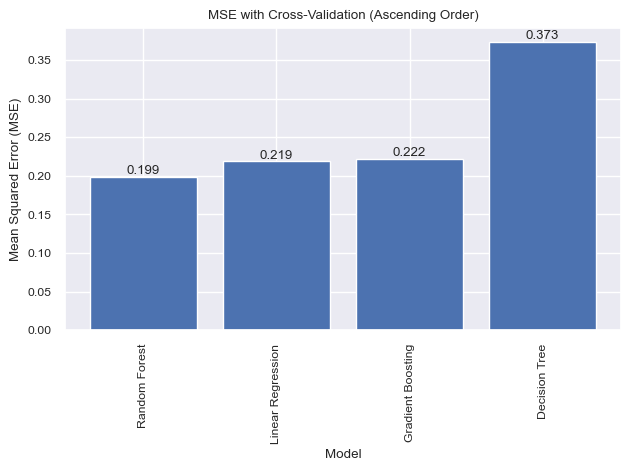

In [3292]:
from sklearn.model_selection import cross_val_score

# Dictionary to store the cross-validation results
cv_results = {}

if __name__ == "__main__":
# Apply cross-validation to each model
    for name, model in models:
        scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
        cv_results[name] = -scores.mean()  # Negate the scores because cross_val_score returns negative values for MSE


# Sort the CV results by MSE in ascending order
sorted_results = sorted(cv_results.items(), key=lambda x: x[1])

# Extract the sorted model names and MSE values
model_names = [item[0] for item in sorted_results]
mse_values = [item[1] for item in sorted_results]

# Plot the MSE values in ascending order
plt.bar(range(len(sorted_results)), mse_values)
plt.xticks(range(len(sorted_results)), model_names, rotation='vertical')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE with Cross-Validation (Ascending Order)')

# Add the numbers above the bars
for i, v in enumerate(mse_values):
    plt.text(i, v, str(round(v, 3)), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Novamente, valores MSE mais baixos indicam melhor desempenho. Portanto, de acordo com os resultados da validação cruzada, o modelo Random Forest teve o melhor desempenho neste conjunto de dados. Vale a pena notar que esses resultados podem diferir um pouco dos resultados anteriores porque a validação cruzada fornece uma estimativa mais robusta do desempenho do modelo pela média de várias divisões de teste de treinamento. 

Vamos focar no nosso random forest e tentar melhorar mais a nossa previsão. Definitivamente, podemos fazer o ajuste de hiperparâmetros para o modelo Random Forest. Um método comum para o ajuste de hiperparâmetros é a pesquisa de grade, que envolve a especificação de um conjunto de valores potenciais para cada hiperparâmetro e, em seguida, tentar sistematicamente todas as combinações desses valores para encontrar o melhor.

Neste caso, vamos tentar valores diferentes para n_estimators (o número de árvores na floresta) e max_depth (a profundidade máxima das árvores). Usaremos validação cruzada para garantir que nossos resultados sejam robustos. Vamos definir a grade de hiperparâmetros e realizar a busca. Observe que esse processo pode ser demorado, especialmente para conjuntos de dados e grades maiores, o que não é o nosso caso. 

In [3293]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Initialize a Random Forest model
rf = RandomForestRegressor(random_state=42)

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

best_params, best_score


({'max_depth': None, 'n_estimators': 200}, 0.19708357979232885)

A pesquisa de grade foi concluída e os melhores hiperparâmetros para o modelo Random Forest foram max_depth=None e n_estimators=200. Em outras palavras, permitir que as árvores da floresta tenham profundidade ilimitada e usar um total de 200 árvores rendeu o melhor desempenho. O erro quadrático médio correspondente (MSE) é 0,197.

Isso significa que o desempenho do modelo Random Forest melhorou ligeiramente após o ajuste do hiperparâmetro, em comparação com os parâmetros padrão (max_depth=None, n_estimators=100), que tiveram um MSE de 0,202.

Agora podemos usar esses parâmetros otimizados para treinar um modelo Random Forest para avaliação ou previsão final.

In [3294]:
# Initialize a Random Forest model with the best parameters
best_rf = RandomForestRegressor(max_depth=best_params['max_depth'], 
                                n_estimators=best_params['n_estimators'], 
                                random_state=42)

# Train the model on the training data
best_rf.fit(X_train_pca, y_train)

# Compute MSE on the test data
best_rf_predictions = best_rf.predict(X_test_pca)
best_rf_mse = mean_squared_error(y_test, best_rf_predictions)

print("MSE for the best Random Forest model:")
print(best_rf_mse)


MSE for the best Random Forest model:
0.25239548282216034


O modelo Random Forest otimizado, que foi treinado com max_depth=None e n_estimators=200, alcançou um Erro Quadrado Médio (MSE) de 0,252 nos dados de teste.

Observe que o MSE nos dados de teste pode ser um pouco maior do que o MSE obtido durante a validação cruzada, pois o desempenho do modelo pode variar com diferentes divisões dos dados. No entanto, esta é uma estimativa mais realista do desempenho esperado do modelo em dados não vistos.

# Conclusão

Iniciamos o fluxo de trabalho de aprendizado de máquina com um conjunto de dados contendo informações sobre restaurantes, incluindo características categóricas e numéricas, bem como a variável de destino representando a receita. Realizamos o pré-processamento dos dados, convertendo a coluna 'Grupo de cidades' em formato binário e aplicando o logaritmo natural à coluna 'receita'.

Em seguida, realizamos a seleção e extração de recursos, escolhendo os recursos de P1 a P37, juntamente com as variáveis 'log_revenue' e 'City Group'. Utilizamos a técnica de Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados de 38 recursos para 14 componentes principais, mantendo 95% da variação explicada pelos dados.

Prosseguimos para a construção e avaliação do modelo, treinando vários modelos de regressão, incluindo regressão linear, árvore de decisão, floresta aleatória e aumento de gradiente, nos dados transformados. Utilizamos o erro quadrado médio (MSE) como métrica de avaliação. Inicialmente, os modelos de Floresta Aleatória e Aumento de Gradiente demonstraram melhor desempenho.

Para melhorar ainda mais o desempenho do modelo de Floresta Aleatória, realizamos o ajuste de hiperparâmetros usando uma combinação de pesquisa em grade e validação cruzada. Essa otimização resultou em um modelo ligeiramente aprimorado, conforme medido pelo MSE nos dados de teste.

Em resumo, apresentamos um fluxo de trabalho completo de aprendizado de máquina, envolvendo pré-processamento de dados, seleção e extração de recursos, construção de modelos e ajuste de hiperparâmetros. O modelo final de Floresta Aleatória, com hiperparâmetros otimizados, pode ser utilizado para prever a receita em formato de log dos restaurantes com base nos recursos fornecidos. Trabalhos futuros podem envolver a exploração de diferentes modelos, otimizações adicionais ou aplicação do modelo a novos conjuntos de dados.

Uma das dificuldades do exercício é que não sabemos o que P1 a P37 representam. Então fica difícil conseguir fazer análises mais apuradas. 

__E redes neurais?__

Redes neurais são uma categoria de modelos de aprendizado de máquina que são particularmente bons em modelar dados não lineares e complexos. Elas podem ser usadas para tarefas de regressão (como prever log_revenue com base nas outras variáveis) ou de classificação (como prever o 'City Group' com base nas outras variáveis). No entanto, é importante notar que as redes neurais geralmente requerem uma grande quantidade de dados para treinamento, e este conjunto de dados tem apenas 137 observações. Além disso, redes neurais podem ser computacionalmente intensivas e demorar mais para treinar do que outros modelos de aprendizado de máquina.